# Matplotlib

Matplotlib é uma biblioteca Python para traçar gráficos 2D que produz figuras de qualidade em vários formatos distintos. Matplotlib pode ser usado em scripts Python, no Python e IPython shell, no jupyter notebook entre outros.

Matplotlib é uma ferramenta bem versátil, que nos permite fazer praticamente qualquer tipo de gráfico (nem todos de maneira fácil). Pode-se traçar pontos, histogramas, gráfico em barras, gráficos de dispersão, etc., com poucas linhas de código ([galeria](https://matplotlib.org/gallery.html)).

Praticamente, todas as bibliotecas de visualização estatística, tais como seaborn, plotnine entre outras, são construídas utilizando rotinas do Matplotlib.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

%matplotlib inline

np.random.seed(123)

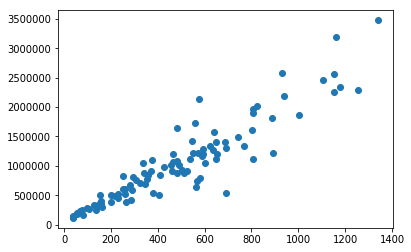

In [2]:
X = np.abs(np.random.normal(60, 500, 100))[:, np.newaxis] 
X[X <= 40] = 40
w = 2000
y = X * (w - np.random.normal(0, 500, X.shape[0]))[:, np.newaxis] + 60000

plt.scatter(X, y)

# plt.show()

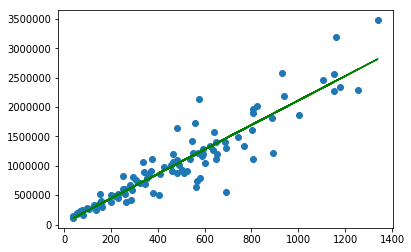

In [3]:
X_l = np.hstack((np.ones((X.shape[0], 1)), X))

b, w = np.linalg.inv(X_l.T.dot(X_l)).dot(X_l.T).dot(y).ravel()

plt.scatter(X, y)
plt.plot(X, w*X + b, color="green")

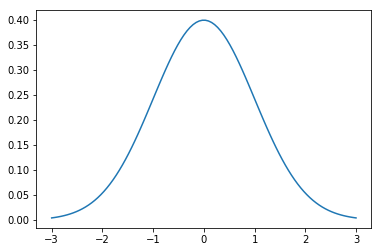

In [4]:
mu = 0
varianca = 1
sigma = np.sqrt(varianca)
x = np.linspace(mu - 3*varianca, mu + 3*varianca, 100)

# plotando uma distribuição normal
plt.plot(x, stats.norm(mu, sigma).pdf(x))

## Gráficos Estatísticos

Muitas vezes em nossas análises os gráficos produzidos são os mesmo, mudando apenas o conjunto de dados em questão. 

Apesar do Matplotlib ser muito versátil, muitas vezes é tedioso fazer gráfico com ele, pois ele é um tanto baixo-nível devido, justamente, há sua versatilidade.

Há em python algumas bibliotecas para traçar gráficos predefinidos que foram projetados para se integrar muito bem ao pandas.DataFrame.

Duas dessas bibliotecas são o [Searborn](https://seaborn.pydata.org/) e [Plotnine](https://github.com/has2k1/plotnine). Nesse curso vamos forcar apenas no Searborn, pois o Plotnine é inspirado no ggplot 2 do R que veremos na aula de R.

### Seaborn 

Seaborn é uma biblioteca de visualização do Python baseada no Matplotlib. Ela provê uma interface de alto-nível para traçar gráficos estatísticos.

Vamos então traçar o gráfico do preço dos imóveis com a reta traça com Seaborn para vermos como é bem mais simples.

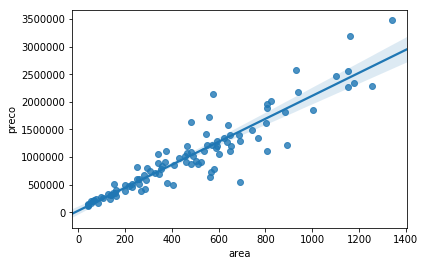

In [36]:
import seaborn as sns

df = pd.DataFrame({'area': X.ravel(), 'preco': y.ravel()})

g = sns.regplot(x="area", y="preco", data=df)

Para introduzir algumas funcionalidades do Seaborn, vamos retornar ao nosso conjunto de dados das flores de iris.

In [37]:
import os
import urllib

import pandas as pd

import seaborn as sns

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
file_path = "dados/iris-dataset.csv"

# baixa se arquivo não existe
if not os.path.isfile(file_path):
    print(url)
    urllib.urlretrieve(url, file_path)
    
iris = pd.read_csv(file_path, 
                 header=None,
                 names=['sepal length', 
                        'sepal width', 
                        'petal length', 
                        'petal width', 
                        'species'])
iris.species = iris.species.apply(lambda x: x.split("-")[-1])

In [38]:
iris.head(10)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## Gráfico de Distribuição

### Distplot

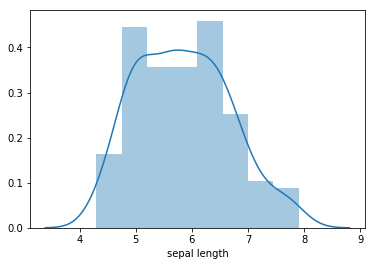

In [91]:

ax = sns.distplot(iris['sepal length'])


# kdeplot

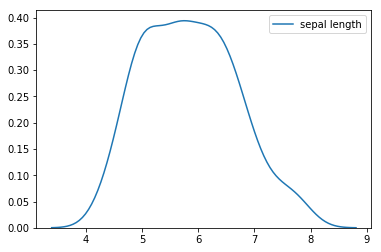

In [95]:
ax = sns.kdeplot(iris['sepal length'])

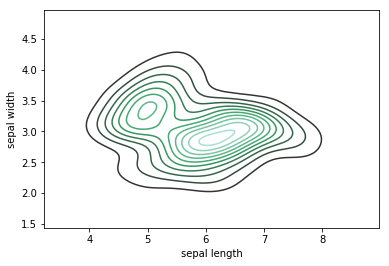

In [96]:
ax = sns.kdeplot(iris['sepal length'], iris['sepal width'])

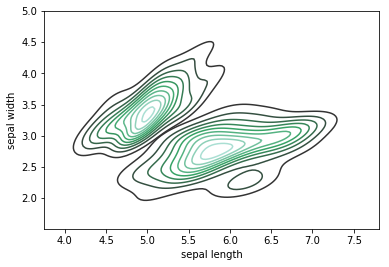

In [98]:
ax = sns.kdeplot(iris.loc[iris.species=="versicolor", 'sepal length'],
                 iris.loc[iris.species=="versicolor", 'sepal width'])

ax = sns.kdeplot(iris.loc[iris.species=="setosa", 'sepal length'],
                 iris.loc[iris.species=="setosa", 'sepal width'])

## Matriz de Dispersão (Scatter Matrix)



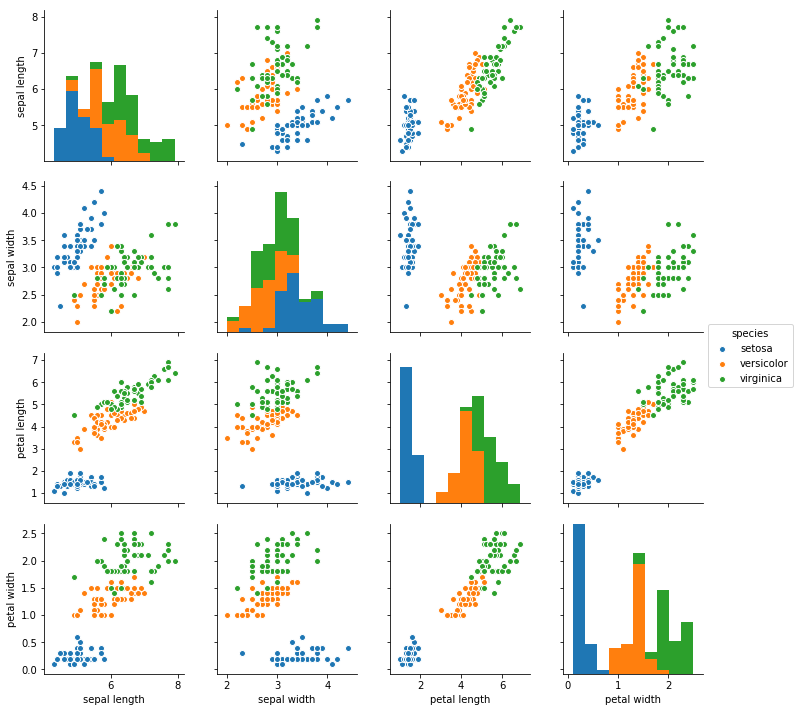

In [46]:
# print(sns.pairplot.__doc__)
sns.pairplot(iris, hue='species')

## Boxplot

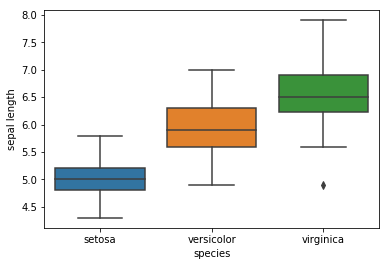

In [55]:
# print(sns.boxplot.__doc__)

sns.boxplot(x = 'species', y = 'sepal length', data = iris)

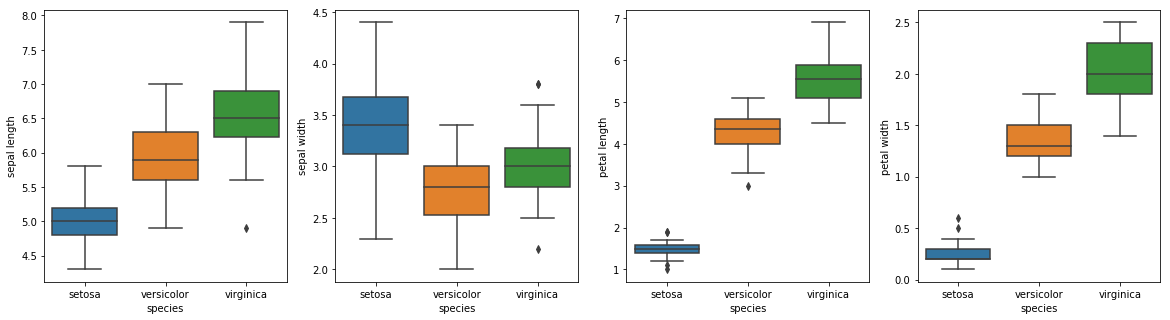

In [80]:
# podemos ainda utilizar dos artificios do matplotlib
fig, axs = plt.subplots(ncols=4, figsize=(20, 5))

for ax, col in zip(axs, iris.columns[:-1]):
    sns.boxplot(x = 'species', y = col, data = iris, ax=ax)

## Violin Plot

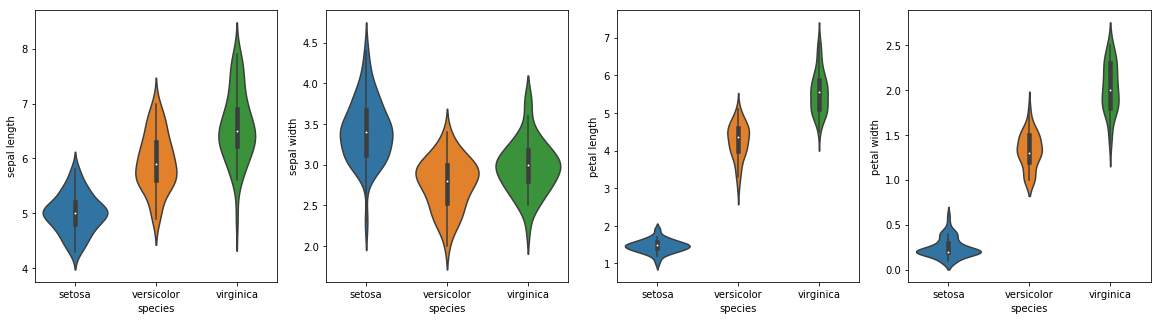

In [79]:
# podemos ainda utilizar dos artificios do matplotlib
fig, axs = plt.subplots(ncols=4, figsize=(20, 5))

for ax, col in zip(axs, iris.columns[:-1]):
    sns.violinplot(x = 'species', y = col, data = iris, ax=ax)

## PairGrid

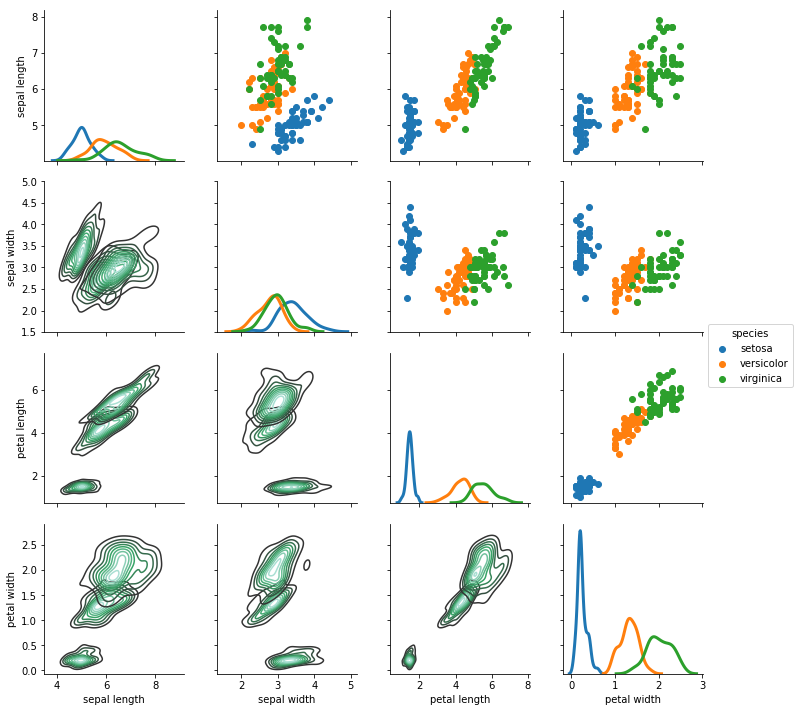

In [76]:
g = sns.PairGrid(iris, hue="species")

g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, hue="species")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)

g.add_legend()

## Clustermap

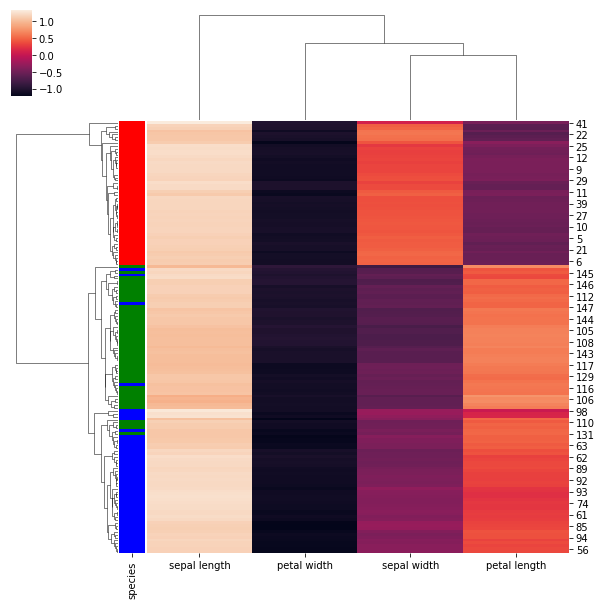

In [52]:
lut = dict(zip(iris.species.unique(), "rbg"))

row_colors = iris.species.map(lut)

sns.clustermap(iris[iris.columns[:-1]], row_colors=row_colors, z_score=0)

### API do seaborn

Para acesso a mais gráficos disponíveis no seaborn acessar: [API seaborn](https://seaborn.pydata.org/api.html)